In [1]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('C:/Users/ASUS/OneDrive/Documents/data analytic/myenv/energy consumption.zip')

In [5]:
df

,Household_ID,Date,Energy_Consumption_kWh,Household_Size,Avg_Temperature_C,Has_AC,Peak_Hours_Usage_kWh
0,H00001,2025-04-01,8.4,4,17.8,No,3.2
1,H00001,2025-04-02,7.9,4,17.3,No,2.8
2,H00001,2025-04-03,9.2,4,18.6,No,3.0
3,H00001,2025-04-04,7.9,4,18.2,No,2.7
4,H00001,2025-04-05,9.6,4,11.9,No,3.2
...,...,...,...,...,...,...,...
89995,H12857,2025-04-04,5.0,2,19.3,No,1.5
89996,H12857,2025-04-05,5.3,2,16.1,No,1.7
89997,H12857,2025-04-06,4.3,2,14.6,No,1.5
89998,H12857,2025-04-07,7.2,2,18.2,No,2.6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Household_ID            90000 non-null  object 
 1   Date                    90000 non-null  object 
 2   Energy_Consumption_kWh  90000 non-null  float64
 3   Household_Size          90000 non-null  int64  
 4   Avg_Temperature_C       90000 non-null  float64
 5   Has_AC                  90000 non-null  object 
 6   Peak_Hours_Usage_kWh    90000 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 4.8+ MB


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


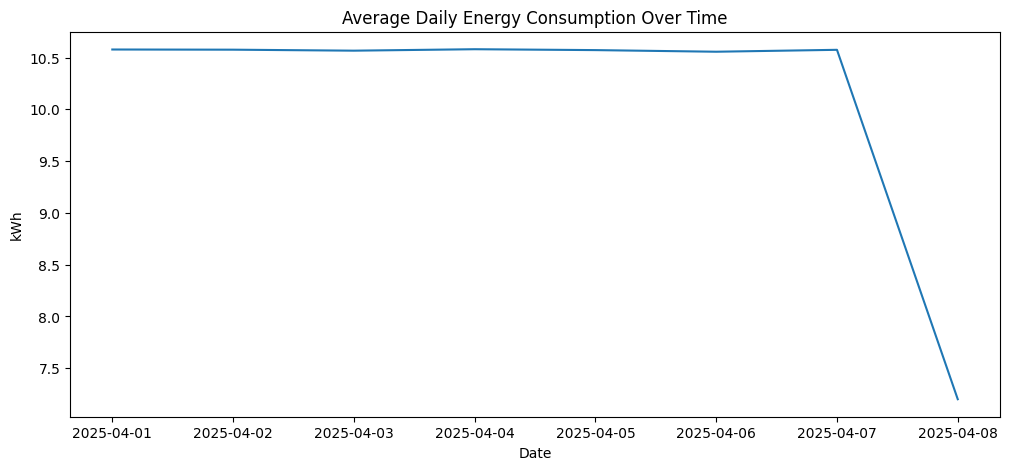

In [14]:
plt.figure(figsize=(12,5))
df.groupby('Date')['Energy_Consumption_kWh'].mean().plot()
plt.title("Average Daily Energy Consumption Over Time")
plt.ylabel("kWh")
plt.xlabel("Date")
plt.show()


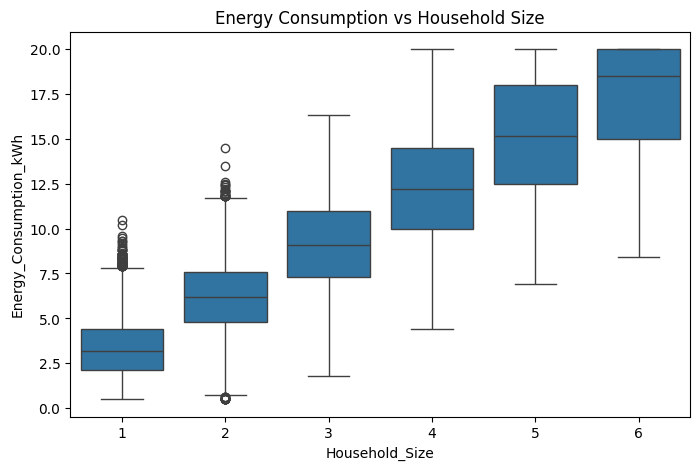

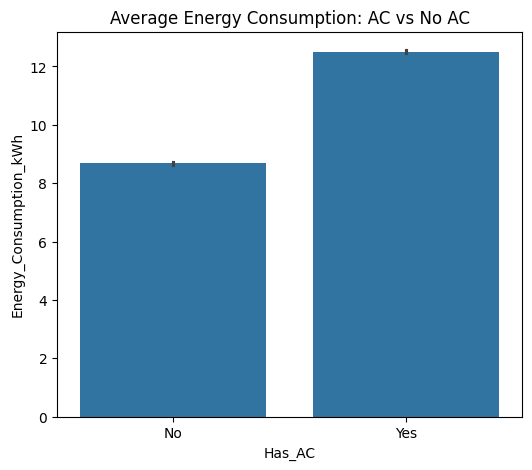

In [15]:
# Boxplot: Household size vs consumption
plt.figure(figsize=(8,5))
sns.boxplot(x='Household_Size', y='Energy_Consumption_kWh', data=df)
plt.title("Energy Consumption vs Household Size")
plt.show()

# Bar chart: AC vs No AC
plt.figure(figsize=(6,5))
sns.barplot(x='Has_AC', y='Energy_Consumption_kWh', data=df)
plt.title("Average Energy Consumption: AC vs No AC")
plt.show()


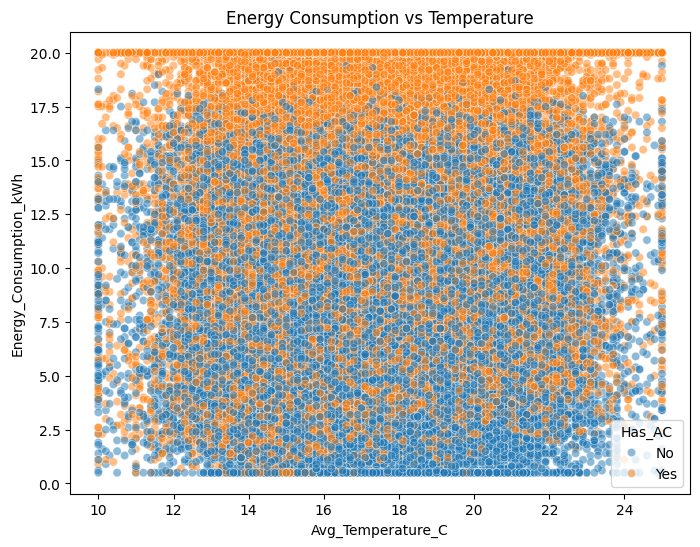

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Avg_Temperature_C', y='Energy_Consumption_kWh',
                hue='Has_AC', data=df, alpha=0.5)
plt.title("Energy Consumption vs Temperature")
plt.show()


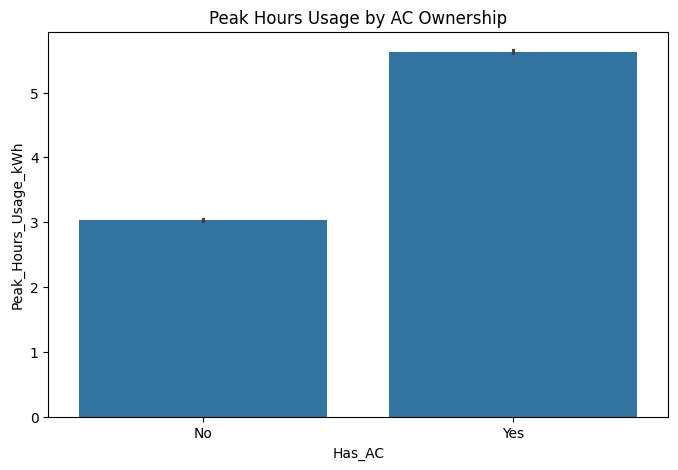

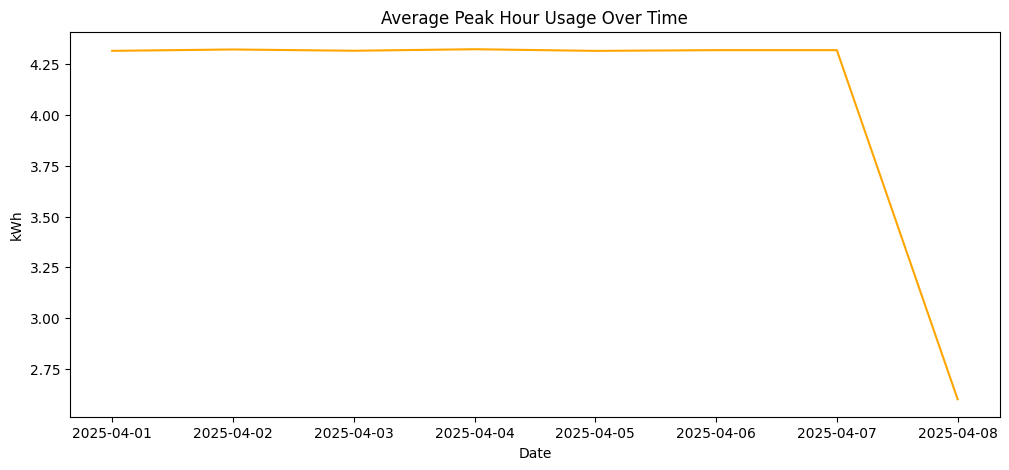

In [17]:
# Bar: Peak usage by AC ownership
plt.figure(figsize=(8,5))
sns.barplot(x='Has_AC', y='Peak_Hours_Usage_kWh', data=df)
plt.title("Peak Hours Usage by AC Ownership")
plt.show()

# Line: Peak usage over time
plt.figure(figsize=(12,5))
df.groupby('Date')['Peak_Hours_Usage_kWh'].mean().plot(color='orange')
plt.title("Average Peak Hour Usage Over Time")
plt.ylabel("kWh")
plt.xlabel("Date")
plt.show()


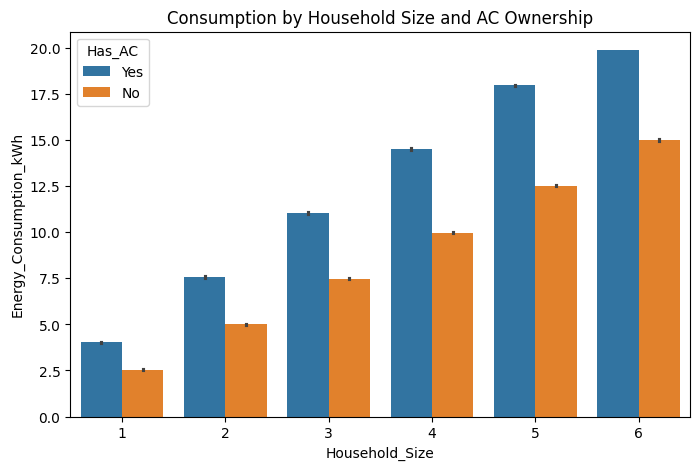

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20708\2674073764.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot = df.groupby(['Household_Size','Temp_Bin'])['Energy_Consumption_kWh'].mean().unstack()


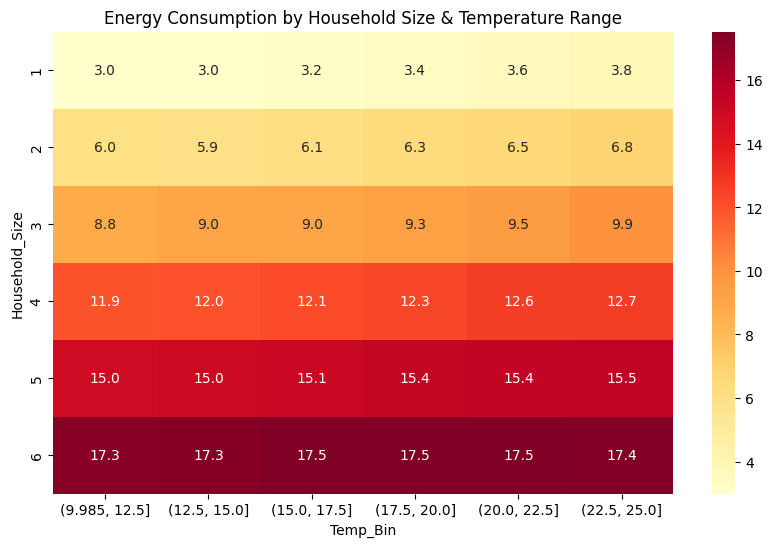

In [18]:
# Barplot grouped by AC
plt.figure(figsize=(8,5))
sns.barplot(x='Household_Size', y='Energy_Consumption_kWh',
            hue='Has_AC', data=df)
plt.title("Consumption by Household Size and AC Ownership")
plt.show()

# Heatmap: Consumption by size & temp bins
df['Temp_Bin'] = pd.cut(df['Avg_Temperature_C'], bins=6)
pivot = df.groupby(['Household_Size','Temp_Bin'])['Energy_Consumption_kWh'].mean().unstack()
plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap="YlOrRd", annot=True, fmt=".1f")
plt.title("Energy Consumption by Household Size & Temperature Range")
plt.show()
